In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split

In [4]:
enc=LabelEncoder()

In [5]:
train=pd.read_csv("train.csv")
y=train['SalePrice']

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
dtype: int64

In [24]:
for i in np.arange(0,200):
    print(y.corr(train['TotalBsmtSF']-i*train['BsmtUnfSF']/1000))

0.6135805515591956
0.6136209792732429
0.6136609245945207
0.6137003861707708
0.6137393626499851
0.6137778526804272
0.6138158549106558
0.613853367989549
0.6138903905663262
0.6139269212905721
0.613962958812261
0.61399850178178
0.6140335488499515
0.6140680986680596
0.6141021498878712
0.6141357011616623
0.6141687511422409
0.6142012984829714
0.6142333418378004
0.6142648798612781
0.6142959112085858
0.6143264345355592
0.6143564484987127
0.6143859517552656
0.6144149429631652
0.6144434207811139
0.6144713838685922
0.6144988308858854
0.6145257604941086
0.6145521713552311
0.6145780621321034
0.614603431488481
0.6146282780890526
0.6146526005994625
0.6146763976863393
0.6146996680173205
0.6147224102610784
0.6147446230873469
0.6147663051669476
0.6147874551718145
0.614808071775023
0.6148281536508147
0.6148476994746239
0.6148667079231047
0.6148851776741574
0.6149031074069558
0.6149204958019733
0.6149373415410105
0.6149536433072219
0.6149693997851433
0.6149846096607184
0.6149992716213272
0.6150133843558114

In [22]:
y.corr(train['TotalBsmtSF'])

0.6135805515591956

In [7]:
print(train['BsmtQual'].value_counts())
print(train[train['BsmtQual']=="TA"]['SalePrice'].mean())
print(train[train['BsmtQual']=="Gd"]['SalePrice'].mean())
print(train[train['BsmtQual']=="Ex"]['SalePrice'].mean())
print(train[train['BsmtQual']=="Fa"]['SalePrice'].mean())
z=train[train["BsmtQual"].isnull()]['SalePrice']

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
140759.81818181818
202688.4789644013
327041.04132231406
115692.02857142857


In [25]:
bq=train[train['BsmtQual'].isna()]['SalePrice']
ind=bq[bq>110000].index
train.loc[ind,'BsmtQual']='Gd'

In [33]:
nbq=train[train['BsmtQual'].isna()]['BsmtQual']
ind2=nbq.index
train.loc[ind2,'BsmtQual']='TA'

In [103]:
train.loc[gd,'BsmtQual']='Gd'

In [105]:
train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [113]:
train['BsmtCond'].fillna('TA',inplace=True)

In [173]:
train['BsmtExposure'].fillna("No",inplace=True)

In [120]:
train[train['BsmtExposure']=="Mn"]

192789.65789473685

In [168]:
print(train['BsmtFinType1'].value_counts())
print(train[train['BsmtFinType1']=='Unf']['SalePrice'].mean())
print(train[train['BsmtFinType1']=='GLQ']['SalePrice'].mean())
print(train[train['BsmtFinType1']=='ALQ']['SalePrice'].mean())
print(train[train['BsmtFinType1']=='BLQ']['SalePrice'].mean())
print(train[train['BsmtFinType1']=='Rec']['SalePrice'].mean())
print(train[train['BsmtFinType1']=='LwQ']['SalePrice'].mean())

Unf    430
GLQ    419
ALQ    223
BLQ    163
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
170670.57674418605
235325.62052505967
161444.07174887892
146376.47239263804
146889.24812030076
151852.7027027027


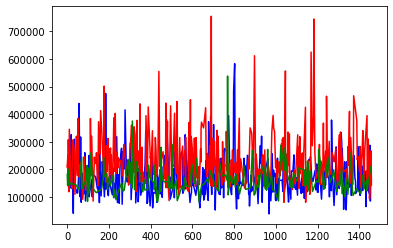

In [137]:
plt.plot(unf,'b')
plt.plot(glq,'r')
plt.plot(alq,'g')

In [170]:
ft=train[train['BsmtFinType1'].isna()]['SalePrice']
ft.index
train.loc[hh,'BsmtFinType1']='Rec'

In [172]:
train['BsmtFinType2'].fillna("Unf",inplace=True)

In [180]:
y.corr(train['TotalBsmtSF'])

0.6135805515591956

In [179]:
train[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,706,Unf,0,150,856
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,TA,Gd,No,ALQ,216,Unf,0,540,756
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145
...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,0,Unf,0,953,953
1456,Gd,TA,No,ALQ,790,Rec,163,589,1542
1457,TA,Gd,No,GLQ,275,Unf,0,877,1152
1458,TA,TA,Mn,GLQ,49,Rec,1029,0,1078


In [189]:
train[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].apply(enc.fit_transform)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,2,3,3,2,361,5,0,73,179
1,2,3,1,0,482,5,0,167,441
2,2,3,2,2,222,5,0,278,214
3,3,1,3,0,66,5,0,346,117
4,2,3,0,2,328,5,0,318,370
...,...,...,...,...,...,...,...,...,...
1455,2,3,3,5,0,5,0,570,238
1456,2,3,3,0,407,4,29,376,577
1457,3,1,3,2,95,5,0,536,375
1458,3,3,2,2,14,4,134,0,325


In [199]:
train['BsmtQual'].value_counts()

3    668
2    626
0    121
1     45
Name: BsmtQual, dtype: int64

In [187]:
train['BsmtQual'].value_counts()

TA    668
Gd    626
Ex    121
Fa     45
Name: BsmtQual, dtype: int64

In [190]:
tr['BsmtQual'].value_counts()

3    668
2    626
0    121
1     45
Name: BsmtQual, dtype: int64

In [200]:
train['BsmtQual'].unique()

array([2, 3, 0, 1])

In [207]:
train['BsmtQual']=enc.inverse_transform(train['BsmtQual'])

In [214]:
train['BsmtQual'][:20].values

array(['Gd', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'Ex', 'Gd', 'TA', 'TA', 'TA',
       'Ex', 'TA', 'Gd', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA'], dtype=object)

In [215]:
sample=['Gd', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'Ex', 'Gd', 'TA', 'TA', 'TA',
       'Ex', 'TA', 'Gd', 'TA', 'TA', 'TA', 'Fa', 'TA', 'TA']

In [217]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [219]:
enc.fit(['Ex','Gd','TA', 'Fa'])

LabelEncoder()

In [220]:
enc.transform(sample)

array([2, 2, 2, 3, 2, 2, 0, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 1, 3, 3])

In [222]:
#gd 2,ta 3, ex 0, fa  1

In [237]:
y.corr(train['TotalBsmtSF']*train['BsmtQual'].replace(to_replace=['Ex','Gd','TA', 'Fa'],value=[3,2,1,0]))

0.6502992049122044

In [45]:
train['BsmtCond'].fillna('TA',inplace=True)
train['BsmtCond'].replace(to_replace=['Gd','TA','Fa','Po'],value=[3,2,1,0],inplace=True)

In [77]:
print(train['BsmtFinType1'].value_counts())
ind=train['BsmtFinType1'].value_counts().index
print(ind)
for i in ind:
    print(train[train['BsmtFinType1']==i]['SalePrice'].mean())
bft=train[train['BsmtFinType1'].isna()]['SalePrice']
bfti=bft.index

Unf    448
GLQ    437
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Index(['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ'], dtype='object')
167207.0267857143
230644.60411899313
161573.06818181818
149493.6554054054
146889.24812030076
151852.7027027027


In [78]:
train.loc[bfti,'BsmtFinType1']='Unf'

In [83]:
train['BsmtFinType1'].replace(to_replace=['GLQ','ALQ','BLQ','Rec','LwQ','Unf'],value=[5,4,3,2,1,0],inplace=True)

In [34]:
train['BsmtQual'].replace(to_replace=['Ex','Gd','TA', 'Fa'],value=[3,2,1,0],inplace=True)

In [36]:
y.corr(train['BsmtQual'])

0.6441698223989986

In [37]:
y.corr(train['TotalBsmtSF'])

0.6135805515591956

In [44]:
y.corr(train['BsmtCond'])

0.15944527738359277

In [84]:
y.corr(train['BsmtFinType1'])

0.2773597595283747

In [85]:
y.corr(train['BsmtUnfSF'])

0.2144791055469689

In [92]:
train['BsmtQual']

0.6150196454061914